In [7]:
import pandas as pd 
# Load dataset 
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\spam.csv", encoding="latin-1") 
df = df[['v1', 'v2']]  # Retaining relevant columns 
df.columns = ['label', 'message'] 
# Display first few rows 
df.head() 

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

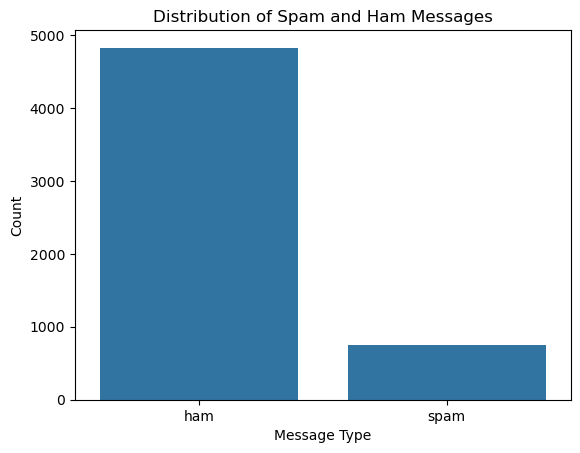

In [13]:
sns.countplot(data=df, x='label') 
plt.title("Distribution of Spam and Ham Messages") 
plt.xlabel("Message Type") 
plt.ylabel("Count") 
plt.show() 


In [15]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.25, 
random_state=0) 

In [19]:
vectorizer = CountVectorizer() 

In [21]:
X_train_counts = vectorizer.fit_transform(X_train) 
X_test_counts = vectorizer.transform(X_test)

In [23]:
X_train_counts

<4179x7354 sparse matrix of type '<class 'numpy.int64'>'
	with 55130 stored elements in Compressed Sparse Row format>

In [25]:
X_test_counts

<1393x7354 sparse matrix of type '<class 'numpy.int64'>'
	with 17357 stored elements in Compressed Sparse Row format>

In [27]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import classification_report, confusion_matrix 

In [29]:
nb_model = MultinomialNB() 

In [31]:
nb_model.fit(X_train_counts, y_train) 


MultinomialNB()

In [33]:
y_pred = nb_model.predict(X_test_counts) 


In [35]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

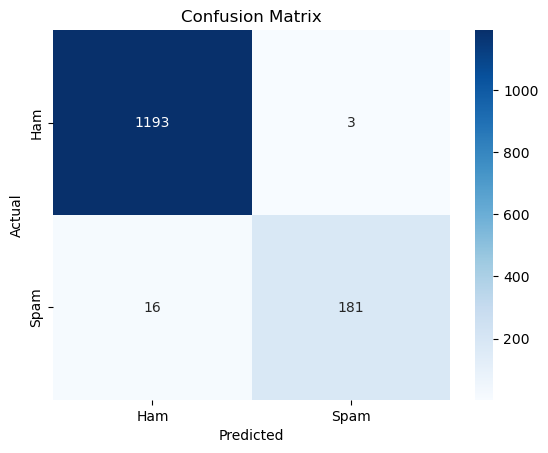

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], 
yticklabels=['Ham', 'Spam']) 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.title("Confusion Matrix") 
plt.show() 

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
texts = ["Free money now!!!", "Hi, how are you?", "Win big prizes", "Let's meet for lunch"]
labels = [1, 0, 1, 0]

In [45]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

In [47]:
model = MultinomialNB()
model.fit(X, labels)

MultinomialNB()

In [49]:
test = vectorizer.transform(["Free lunch now"])
print(model.predict(test))  

[1]
